In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-turbine-scada-dataset/T1.csv


**EDA Using a Wrangle function**

In [63]:
def wrangle(filename):
    df = pd.read_csv(filename).set_index("Date/Time")
    #Convert your Date/Time column to DatetimeIndex
    df.index = pd.to_datetime(df.index)
    #Resample to 1H window
    #df = df["Wind Speed (m/s)"].resample("1H").mean().fillna(method="ffill").to_frame()
    
    return df

**Read the Data into a DataFrame**

In [64]:
df = wrangle("/kaggle/input/wind-turbine-scada-dataset/T1.csv")
print("df shape:", df.shape)
print(df.info())
df.head()

df shape: (50530, 4)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50530 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            50530 non-null  float64
 1   Wind Speed (m/s)               50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB
None


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [65]:
assert isinstance(df.index, pd.DatetimeIndex)

In [4]:
#date_string = "2018-01-01"
#start_date = pd.to_datetime(date_string, format="%Y-%m-%d")
#end_date = start_date + pd.DateOffset(years=1)
#time_series = pd.date_range(start=start_date, end=end_date, freq="10min")
#time_series

In [66]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

**Convert the time from UTC to "Africa/Nairobi"**

In [10]:
#df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
#df.head()
#df["Date/Time"].tail()

**Convert Wind Direction (°) column to radians**

In [67]:
df["radians"] = np.radians(df["Wind Direction (°)"])
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians
Date/Time,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,4.537767
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,4.688672
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,4.757153
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,4.734347
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,4.636891


**Create cosθ col**

In [68]:
df["cosθ"] = np.cos(df["radians"])
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ
Date/Time,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,4.537767,-0.173736
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,4.688672,-0.023715
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,4.757153,0.044749
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,4.734347,0.021956
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,4.636891,-0.075426


**Create sinθ column**

In [69]:
df["sinθ"] = np.sin(df["radians"])
df.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ
Date/Time,,,,,,,
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,1.405038,0.165001,0.986293
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,1.467169,0.103442,0.994636
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,1.479036,0.091632,0.995793
2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,1.471276,0.099356,0.995052
2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620,1.435963,0.134425,0.990924


**Create small vector(v) column**

**A vector quantity is a physical Quantity that has both magnitude and direction e.g Force, Velocity, Acceleration, displacement**

In [70]:
df["v"] = df["Wind Speed (m/s)"] * df["cosθ"]
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ,v
Date/Time,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,4.537767,-0.173736,-0.984792,-0.922769
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,4.688672,-0.023715,-0.999719,-0.134514
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,4.757153,0.044749,-0.998998,0.233413
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,4.734347,0.021956,-0.999759,0.124264
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,4.636891,-0.075426,-0.997151,-0.420723


**Create a Scallar Quantity Column**

**Scallar quantity is a physical Quantity that only has magnitude with no direction e.g mass, distance**

In [71]:
df["u"] = df["Wind Speed (m/s)"] * df["sinθ"]
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ,v,u
Date/Time,,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,4.537767,-0.173736,-0.984792,-0.922769,-5.230563
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,4.688672,-0.023715,-0.999719,-0.134514,-5.670572
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,4.757153,0.044749,-0.998998,0.233413,-5.210812
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,4.734347,0.021956,-0.999759,0.124264,-5.658310
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,4.636891,-0.075426,-0.997151,-0.420723,-5.562052


**Check for missing values**

In [72]:
df.isna()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),radians,cosθ,sinθ,v,u
Date/Time,,,,,,,,,
2018-01-01 00:00:00,False,False,False,False,False,False,False,False,False
2018-01-01 00:10:00,False,False,False,False,False,False,False,False,False
2018-01-01 00:20:00,False,False,False,False,False,False,False,False,False
2018-01-01 00:30:00,False,False,False,False,False,False,False,False,False
2018-01-01 00:40:00,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,False,False,False,False,False,False,False,False,False
2018-12-31 23:20:00,False,False,False,False,False,False,False,False,False
2018-12-31 23:30:00,False,False,False,False,False,False,False,False,False


**Check for the sum of all Missing values**

In [73]:
df.isna().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
radians                          0
cosθ                             0
sinθ                             0
v                                0
u                                0
dtype: int64

In [74]:
import matplotlib.pyplot as plt
import plotly.express as px
import pytz
#from pymongo import MongoClient
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**Check for the data types**

In [75]:
df.dtypes

LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
radians                          float64
cosθ                             float64
sinθ                             float64
v                                float64
u                                float64
dtype: object

**Create a boxplot of wind Speed**

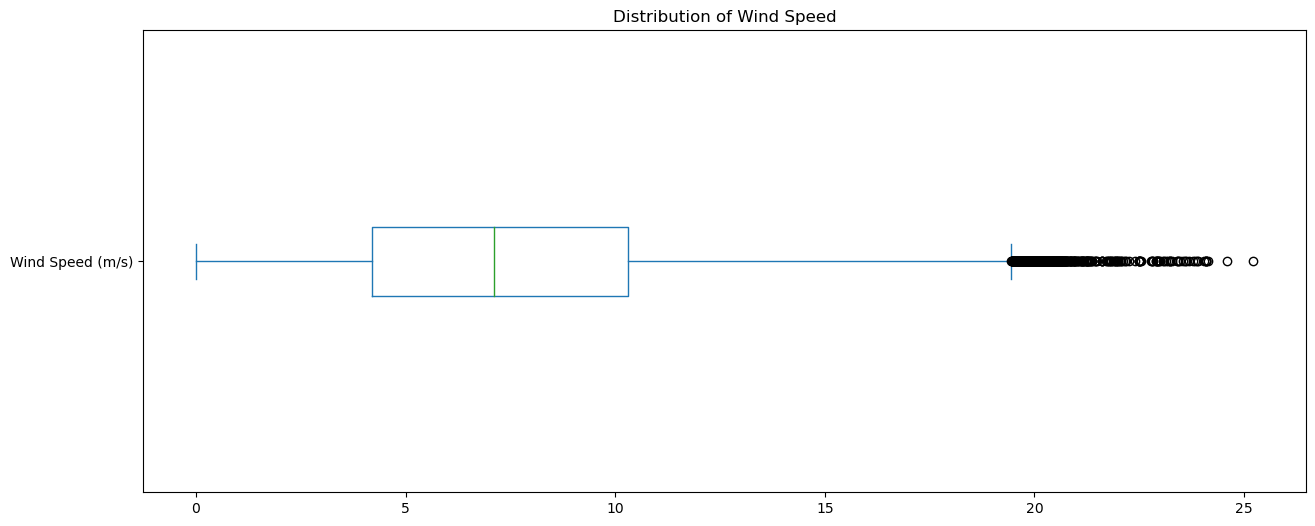

In [76]:
fig, ax=plt.subplots(figsize=[15,6])
df["Wind Speed (m/s)"].plot(kind="box", title="Distribution of Wind Speed", vert=False, ax=ax);

**Time Series plot on wind Speed**

From left to right, we are moving progressively into the future

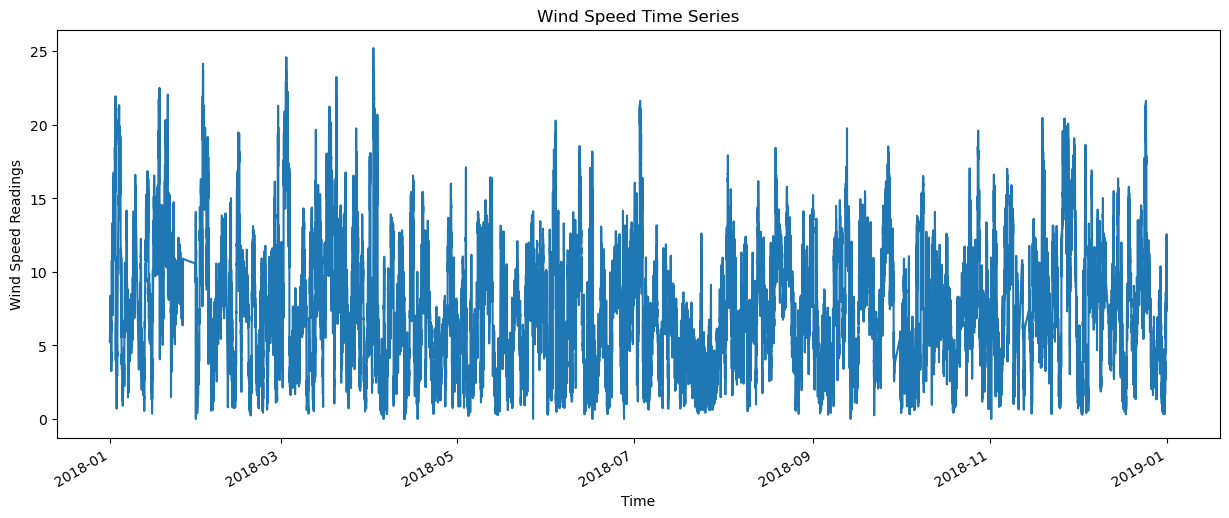

In [77]:
fig, ax=plt.subplots(figsize=[15,6])
df["Wind Speed (m/s)"].plot(xlabel="Time", ylabel="Wind Speed Readings", title="Wind Speed Time Series", ax=ax);

When building a model you need to ask yourself what is it you want to predict, in this case I want to predict Wind speed at different intervals i.e every second, minute, hour, day, and month, for the purposes of this project I will do an hourly prediction, in order for that to work I will have to adjust intervals at which we have readings.
I will predict an average wind speed readings for each hour.
N/B: whenever you're doing a time series predictions, you need to do it at regular intervals, every single interval from the start to the end of your dataset should have values in it, you can't have hours with no wind speed values, so you should be able to impute them with fillna command using ffill method

In [78]:
df["Wind Speed (m/s)"].resample("1H").mean().fillna(method="ffill")#.isnull().sum()

Date/Time
2018-01-01 00:00:00     5.506868
2018-01-01 01:00:00     5.644205
2018-01-01 02:00:00     6.452037
2018-01-01 03:00:00     6.811455
2018-01-01 04:00:00     7.748749
                         ...    
2018-12-31 19:00:00     6.481788
2018-12-31 20:00:00     8.083644
2018-12-31 21:00:00     9.121862
2018-12-31 22:00:00    11.340147
2018-12-31 23:00:00     9.855317
Freq: H, Name: Wind Speed (m/s), Length: 8760, dtype: float64

Convert the hourly Time Series Data into a DataFrame, then use it in your wrangle function

In [80]:
df_hourly = df["Wind Speed (m/s)"].resample("1H").mean().fillna(method="ffill").to_frame()
df_hourly

,Wind Speed (m/s)
Date/Time,
2018-01-01 00:00:00,5.506868
2018-01-01 01:00:00,5.644205
2018-01-01 02:00:00,6.452037
2018-01-01 03:00:00,6.811455
2018-01-01 04:00:00,7.748749
...,...
2018-12-31 19:00:00,6.481788
2018-12-31 20:00:00,8.083644
2018-12-31 21:00:00,9.121862


Redo your boxplot with hourly resampled data

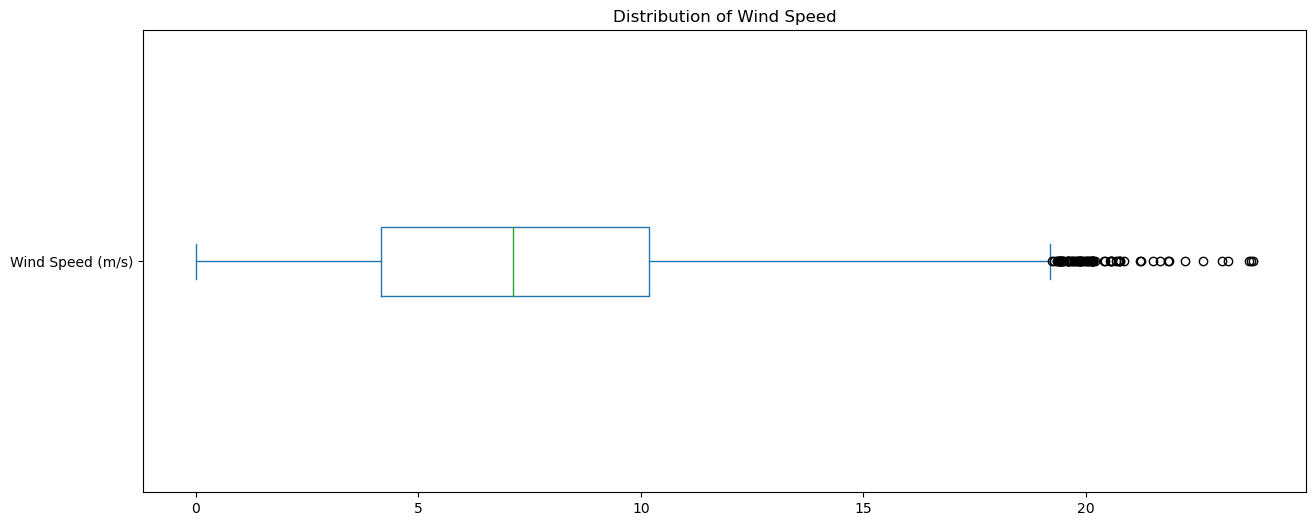

In [81]:
fig, ax=plt.subplots(figsize=[15,6])
df_hourly["Wind Speed (m/s)"].plot(kind="box", title="Distribution of Wind Speed", vert=False, ax=ax);

**Redo the Time Series plot with resampled data; Should be much smoother than what we saw before**

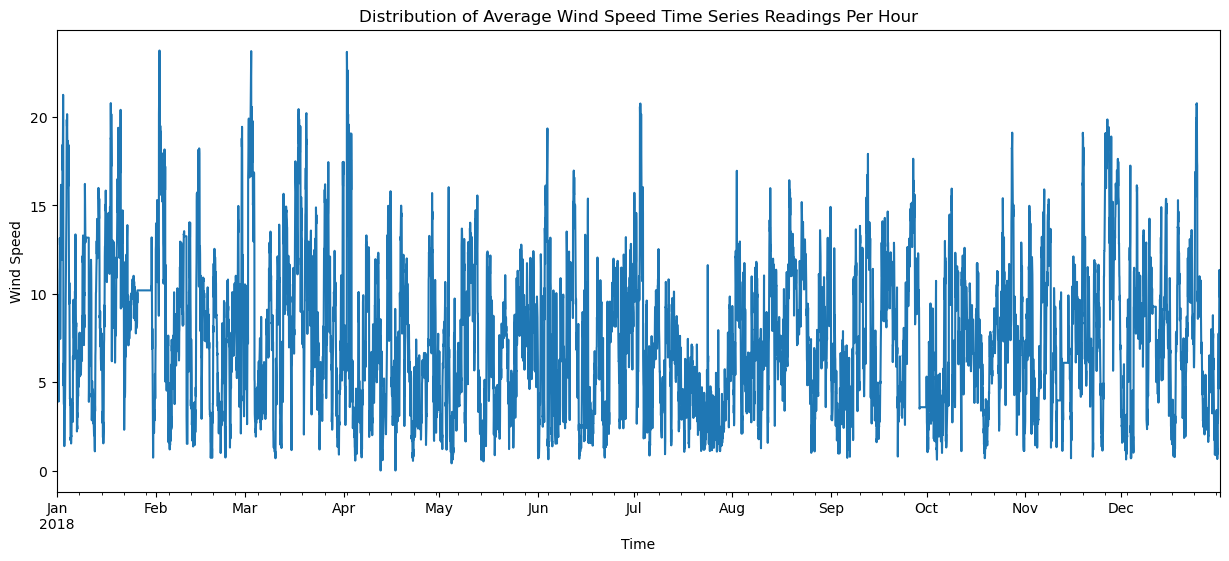

In [83]:
fig, ax=plt.subplots(figsize=[15,6])
df_hourly["Wind Speed (m/s)"].plot(xlabel="Time", ylabel="Wind Speed", title="Distribution of Average Wind Speed Time Series Readings Per Hour", ax=ax);

in the above plot you can see that we have very high peaks and very low valleys because our data is jumping a lot, this is reflected on our y-axis where values are jumping all the from 0 to about 25, this is a reflection of those extreme values,there's nothing wrong with this plot, but because there is up and down movement in it,it can be difficult to see some sort of trend e.g is it increasing or decreasing, and this is commonly observed with Time Series data
a good way to observe the trends is by using a rolling average(rolling window average) which can be a good way to smooth Time Series data, to kindof see general trend, it's done by taking a window which represents 24hours, take mean values in this window and plot, move your window forward, take a new average and plot that, and what you will see is that when you move that window on the data and you plot those averages, you'll smooth out those peaks and valleys and maybe see some sort of general trend on the data that would be important to model.
since our data is already at 1hour interval, put in the number of periods in our window while calculating rolling average, you can do a rolling average of the number of hours in a week (168)

In [85]:
df_hourly["Wind Speed (m/s)"].rolling(168).mean()

Date/Time
2018-01-01 00:00:00         NaN
2018-01-01 01:00:00         NaN
2018-01-01 02:00:00         NaN
2018-01-01 03:00:00         NaN
2018-01-01 04:00:00         NaN
                         ...   
2018-12-31 19:00:00    5.277880
2018-12-31 20:00:00    5.202400
2018-12-31 21:00:00    5.145156
2018-12-31 22:00:00    5.108609
2018-12-31 23:00:00    5.064731
Freq: H, Name: Wind Speed (m/s), Length: 8760, dtype: float64

In [86]:
#number of missing values after rolling average
df_hourly["Wind Speed (m/s)"].rolling(168).mean().isnull().sum()

167

We have 167 missing values, one less than my window, this implies that the first 168 hours in my dataset, there is nothing there because i don't have a full window that I need to calculate that average, so my plot is going to start 168hours into my data

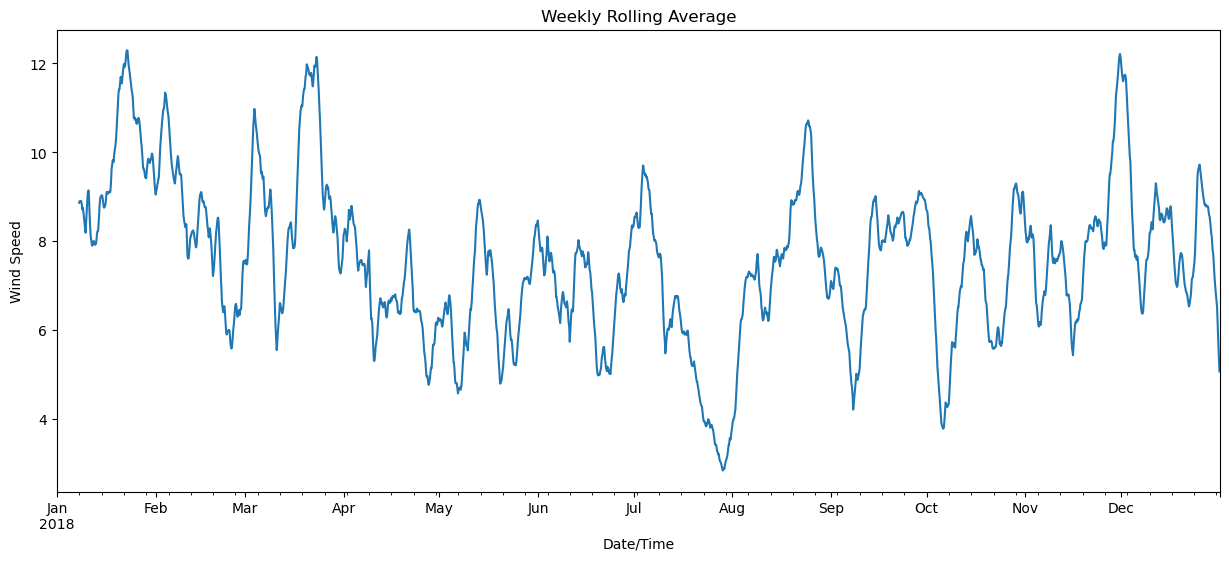

In [87]:
#Plot the rolling average of the "Wind Speed (m/s)" readings in df_hourly. Use a window size of 168 (the number of hours in a week)
fig, ax=plt.subplots(figsize=[15,6])
df_hourly["Wind Speed (m/s)"].rolling(168).mean().plot(ax=ax, ylabel="Wind Speed", title="Weekly Rolling Average");

Notice that in the above plot our y-axis values don't go from 0 to about 25, now they go from 4 to 12, so we've managed to even out the high peaks and low valleys i.e canceled each other out, we've actually smoothen out our data.

With more data like over several years, we could see seasonal or general trends over years.

Remember that when you wanna train a machine learning model, you need a feature matrix(X) and a target vector(y), if you only have one column of a time series data, you can engineer the column so that we can train our model to predict wind speed readings, take the target column and manipulate it in a way to turn it into a feature, so you gonna shift the data and create a lag of 1 by shifting one column down to get the Wind Speed readings from the previous hour i.e use the previous hour reading to predict the present reading

In [101]:
#Add lag feature and dropna
df_hourly["Wind Speed_L1"] = df_hourly["Wind Speed (m/s)"].shift(1)
df_hourly.dropna(inplace=True)

In [102]:
df_hourly.head()

,Wind Speed (m/s),Wind Speed_L1
Date/Time,,
2018-01-01 06:00:00,7.183671,7.236854
2018-01-01 07:00:00,6.804743,7.183671
2018-01-01 08:00:00,5.984986,6.804743
2018-01-01 09:00:00,5.984972,5.984986
2018-01-01 10:00:00,5.661419,5.984972


We now have a feature and a target, our feature is the reading from the previuos timestamp, we need to see whether there's a relationship between those two columns and a good way to do that is by looking at the correlation, this is an example of an autocorrelation since we want to see what happened in the previous hour and what is happenening now

In [103]:
#Create a correlation matrix 
df_hourly.corr()

,Wind Speed (m/s),Wind Speed_L1
Wind Speed (m/s),1.000000,0.940523
Wind Speed_L1,0.940523,1.000000


There seems to be a very strong correlation between what happened at Timestamp (t) and what happened in the previous hour (timestamp (t-1)) i.e 0.94 which is getting pretty close to 1

Let's Create a scatter plot that shows  "Wind Speed (m/s)" mean reading for each hour as a function of the mean reading from the previous hour. In other words, "Wind Speed_L1" should be on the x-axis, and "Wind Speed (m/s)" should be on the y-axis.

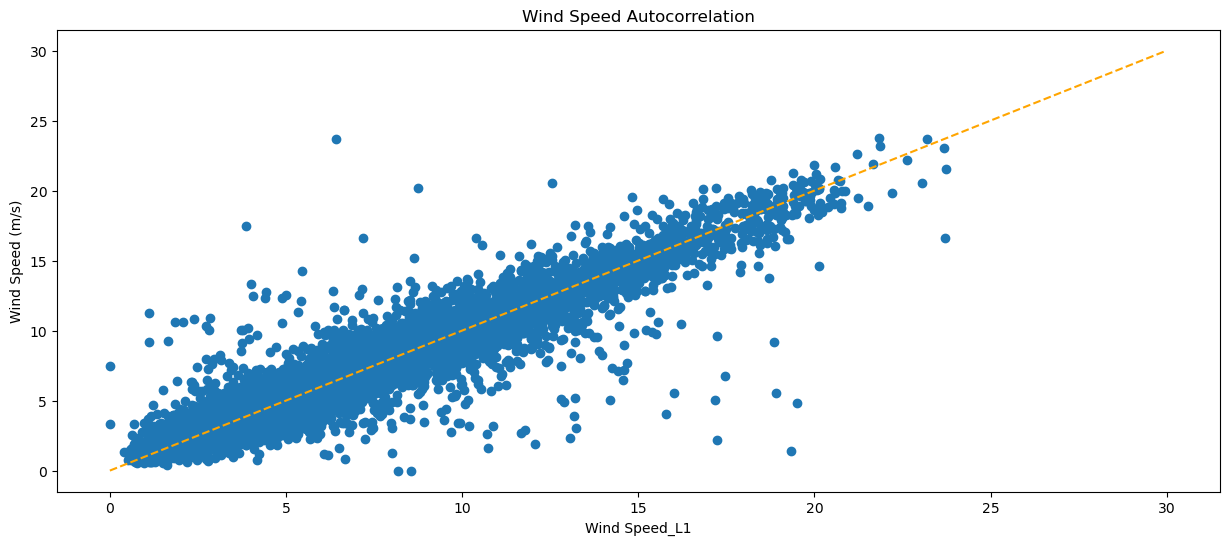

In [107]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x=df_hourly["Wind Speed_L1"], y=df_hourly["Wind Speed (m/s)"])
ax.plot([0, 30], [0, 30], linestyle="--", color="orange")
plt.xlabel("Wind Speed_L1")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Autocorrelation");

The above plot does seem pretty symmetrical. Hence, there seem to be a strong predictive power between the feature column and target(Wind Speed (m/s))

In [ ]:
fig, ax1 = plt.subplots(figsize=[15,6])
ax1.plot(df["radians"].head(80), color="blue", label="Direction", marker="*")
ax1.set_xlabel("Date")
ax1.set_ylabel("Direction in Radians")
#set another y axis
ax2= ax1.twinx()
ax2.plot(df["Wind Speed (m/s)"].head(80), color="green", label="Magnitude", marker="o")
ax2.set_ylabel("Wind Speed")
plt.legend();

In [ ]:
pip install windrose

In [ ]:
import windrose

In [ ]:
from windrose import WindroseAxes

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), subplot_kw = {"projection": "windrose"})
ax.bar(df["Wind Speed (m/s)"], df["Wind Direction (°)"])
plt.show();